# LSTM


LSTM(Long Short-Term Memory)은 **순환신경망(RNN, Recurrent Neural Network)**의 일종으로, RNN의 단점인 **장기 의존성 문제**를 해결하기 위해 고안된 신경망 구조이다.

**LSTM의 주요 특징**
1. **장기 의존성(Long-Term Dependency) 처리**
   - 일반적인 RNN은 시간이 길어질수록 과거의 정보를 잘 기억하지 못하는 **기울기 소멸(Gradient Vanishing)** 문제가 발생한다.
   - LSTM은 **Cell State**와 **게이트 구조**를 통해 중요한 정보를 장기적으로 유지할 수 있다.

2. **게이트(Gates) 구조**
   - LSTM은 정보를 선택적으로 기억하거나 잊게 해주는 3가지 게이트로 구성된다:
     - **입력 게이트(Input Gate):** 새로운 정보를 얼마나 저장할지 결정한다.
     - **망각 게이트(Forget Gate):** 기존 정보를 얼마나 잊을지 결정한다.
     - **출력 게이트(Output Gate):** 현재 상태를 출력에 얼마나 반영할지 결정한다.

3. **Cell State**
   - 네트워크의 **기억 장치** 역할을 하며, 중요하지 않은 정보는 제거하고 중요한 정보는 유지한다.


**LSTM의 구조**

![](https://d.pr/i/iPf2jG+)

아래는 LSTM의 한 타임스텝(time step)에서 이루어지는 연산 과정이다:

1. **망각 게이트 (Forget Gate)**  
    * 이전 상태 $h_{t-1}$와 입력 $x_t$를 통해 제거할 정보를 결정한다.

$$
f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
$$

2. **입력 게이트 (Input Gate)**
    - 입력 게이트 $i_t$와 새로운 정보 $\tilde{C}_t$를 결합하여 Cell State에 반영할 정보를 생성한다.
    
$$
i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
$$

$$
\tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)
$$

3. **Cell State 업데이트**  
    * 이전 Cell State $C_{t-1}$와 새로운 정보의 조합으로 현재 Cell State를 업데이트한다.

$$
C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C}_t
$$

    

4. **출력 게이트 (Output Gate)**  
    * 출력 게이트 $o_t$와 업데이트된 Cell State $C_t$를 통해 새로운 은닉 상태 $h_t$를 계산한다.
    
$$
o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
$$

$$
h_t = o_t \cdot \tanh(C_t)
$$

**LSTM의 장점**

1. **장기 시퀀스 데이터 처리**: 시간의 흐름에 따라 발생하는 데이터를 잘 학습한다.
2. **텍스트, 음성, 시계열 데이터에 적합**: 언어 모델링, 번역, 주가 예측, 음성 인식 등 다양한 분야에서 활용된다.
3. **기울기 소멸 문제 해결**: Cell State와 게이트 구조 덕분에 학습이 안정적이다.

**추가 활용**

- **양방향 LSTM (Bidirectional LSTM)**: 양방향으로 데이터를 처리하여 더 많은 정보를 학습할 수 있다.
- **Stacked LSTM**: LSTM 레이어를 여러 층 쌓아 더 복잡한 패턴을 학습한다.

## LSTM 구조

In [ ]:
# LSTM
import torch                         # PyTorch(텐서 연산/딥러닝) 라이브러리 불러오기
import torch.nn as nn                # 신경망 레이어(nn) 모듈을 nn이라는 별칭으로 불러오기
import torch.optim as optim          # 최적화 알고리즘 (Adam 등)
batch_size = 2                       # B : 한 번에 처리할 샘플(문장) 개수 = 2
seq_len = 3                          # T : 시퀀스 길이(타임스텝 수) = 3
input_size = 4                       # F : 각 타임스텝의 입력 특징(feature) 차원 = 4
hidden_size = 5                      # H : LSTM의 hidden state(은닉 상태) 차원 = 5

x = torch.randn(batch_size, seq_len, input_size)  # (B, T, F) 모양의 랜덤 입력 텐서 생성
print(x.shape)                       # 입력 텐서의 shape 출력

# LSTM 생성 (B, T, F) 형태로 입력을 받도록 설정
lstm = nn.LSTM(input_size, hidden_size, batch_first=True)  # batch_first=True로 입력을 (B,T,F)로 받는 LSTM 생성
output, (hidden, cell) = lstm(x)              # 입력 x를 LSTM에 넣어 전체 출력(output)과 마지막 hidden(hidden) 얻기

print(output.shape)                  # output: 모든 타임스텝의 hidden state들 shape 출력 (B, T, H)
print(hidden.shape)                  # hidden: 마지막 타임스텝의 hidden state shape 출력 (num_layers, B, H)
print(cell.shape)                    # (Num_layers, B, H) : 마지막 시점 cell state


torch.Size([2, 3, 4])
torch.Size([2, 3, 5])
torch.Size([1, 2, 5])
torch.Size([1, 2, 5])


## IMDB 리뷰 감성분석
- IMDB 데이터는 영화 리뷰 텍스트와 그 리뷰의 감성(긍정/부정) 라벨로 구성된 이진 분류용 데이터셋
- 입력(X): 영화 리뷰 문장(원문 텍스트) → `tensorflow.keras.datasets.imdb`로 불러오면 “바로 모델에 넣어 실습할 수 있게” 미리 전처리된 형태(단어→정수 ID)로 제공
- 정답(y): 감성 라벨 0=부정, 1=긍정
- imdb.load_data(num_words=vocab_size)의 의미: 빈도 상위 vocab_size개 단어만 단어사전에 남기고, 나머지는(덜 나온 단어) 잘리거나 OOV로 처리되는 방식

- 결과적으로 **“영화 리뷰가 긍정인지 부정인지 맞추는 감성분류 데이터”**

In [2]:
from tensorflow.keras.datasets import imdb

vocab_size = 300                # 사용할 단어 사전 크기 (빈도 상위인 단어만 유지)

# IMDB 데이터 로드 (단어 ID 시퀀스 형태)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)
print(X_train.shape, y_train.shape)     # 학습 데이터 개수
print(X_test.shape, y_test.shape)       # 테스트 데이터 개수

c:\Users\Playdata\nlp\nlp_venv\Lib\site-packages\numpy\lib\_format_impl.py:838: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  array = pickle.load(fp, **pickle_kwargs)


(25000,) (25000,)
(25000,) (25000,)


imdb 단어사전 생성 및 리뷰 디코드

In [8]:
# 단어사전 생성
from keras.datasets import imdb                          # IMDB 데이터셋과 단어 인덱스를 제공하는 모듈

word_index = imdb.get_word_index()                       # 단어 → 정수 인덱스 매핑 딕셔너리 로드

pad_token = 0                                            # 패딩 토큰 인덱스
start_char = 1                                           # 문장 시작 토큰 인덱스
oov_char = 2                                             # 사전에 없는 단어(OOV) 토큰 인덱스
index_from = 2                                           # 실제 단어 인덱스가 시작되는 offset 값

# word_index(word->index)를 index->word 로 뒤집어서 생성
index_word = {                                           # 정수 인덱스 → 단어 매핑 딕셔너리 생성
    index + index_from: word                             # Keras IMDB는 index_from만큼 인덱스를 밀어서 사용
    for word, index in word_index.items()                # (단어, 인덱스) 쌍을 순회
    if index <= vocab_size                               # vocab_size 이하 단어만 사용
}

index_word[pad_token] = '[PAD]'                          # 0번 인덱스를 패딩 토큰으로 지정
index_word[start_char] = '[START]'                       # 1번 인덱스를 문장 시작 토큰으로 지정
index_word[oov_char] = '[OOV]'                           # 2번 인덱스를 미등록 단어 토큰으로 지정

index_word = dict(sorted(index_word.items(), key=lambda item: item[0]))  
# 인덱스 번호를 기준으로 정렬하여 가독성 있게 재구성

list(index_word.items())[:10]                            # 앞에서부터 10개의 (인덱스, 단어) 쌍 확인


[(0, '[PAD]'),
 (1, '[START]'),
 (2, '[OOV]'),
 (3, 'the'),
 (4, 'and'),
 (5, 'a'),
 (6, 'of'),
 (7, 'to'),
 (8, 'is'),
 (9, 'br')]

In [9]:
# 단어 ID 시퀀스를 텍스트 리뷰로 디코딩
decoded_review = ' '.join(index_word.get(i, "?") for i in X_train[0])
decoded_review

"[START] that on as about [OOV] [OOV] [OOV] [OOV] really [OOV] [OOV] see [OOV] and again who each a are any about [OOV] life what [OOV] [OOV] br they [OOV] everything a though and part life look [OOV] [OOV] [OOV] like and part [OOV] [OOV] for [OOV] from this [OOV] and take what as of those [OOV] movie that on and [OOV] [OOV] [OOV] and on me because i as about [OOV] from been was this [OOV] and on for [OOV] for i as [OOV] with [OOV] a which [OOV] i is [OOV] is two a and [OOV] [OOV] as [OOV] see [OOV] by and still i as from [OOV] a are off good who scene some are [OOV] by of on i come he bad more a that [OOV] as into [OOV] is and films best [OOV] was each and [OOV] to [OOV] a [OOV] who me about [OOV] [OOV] his [OOV] [OOV] has to and [OOV] [OOV] this characters how and [OOV] was american too at [OOV] no his something of enough [OOV] with and bit on film say [OOV] his [OOV] a back one [OOV] with good who he there's made are characters and bit really as from [OOV] how i as actor a as [OOV] 

정확도가 중요하면 vocab_size를 늘린다.

In [10]:
# 메모리 사용량 조절 train_size, test_size
train_size = 15000   # 학습 샘플 수
test_size = 10000    # 테스트 샘플 수 
X_train = X_train[:train_size]
y_train = y_train[:train_size]
X_test = X_test[:test_size]
y_test = y_test[:test_size]

print(X_train.shape, y_train.shape) # 학습 데이터 개수
print(X_test.shape, y_test.shape)   # 테스트 데이터 개수

(15000,) (15000,)
(10000,) (10000,)


In [12]:
# IMDB 시퀀스/라벨을 PyTorch Tensor로 변환
X_train = [torch.tensor(seq, dtype = torch.long) for seq in X_train]    # 학습 시퀀스(단어 ID 리스트) -> LongTensor 로 변환
X_test = [torch.tensor(seq, dtype = torch.long) for seq in X_test]      # 테스트 시퀀스(단어 ID 리스트) -> LongTensor 로 변환

y_train = torch.tensor(y_train, dtype = torch.float)    # 학습 라벨(0/1) -> FloatTensor로 변환
y_test = torch.tensor(y_test, dtype = torch.float)      # 테스트 라벨(0/1) -> FloatTensor로 변환

X_train[0] , X_train[0].shape

(tensor([  1,  14,  22,  16,  43,   2,   2,   2,   2,  65,   2,   2,  66,   2,
           4, 173,  36, 256,   5,  25, 100,  43,   2, 112,  50,   2,   2,   9,
          35,   2, 284,   5, 150,   4, 172, 112, 167,   2,   2,   2,  39,   4,
         172,   2,   2,  17,   2,  38,  13,   2,   4, 192,  50,  16,   6, 147,
           2,  19,  14,  22,   4,   2,   2,   2,   4,  22,  71,  87,  12,  16,
          43,   2,  38,  76,  15,  13,   2,   4,  22,  17,   2,  17,  12,  16,
           2,  18,   2,   5,  62,   2,  12,   8,   2,   8, 106,   5,   4,   2,
           2,  16,   2,  66,   2,  33,   4, 130,  12,  16,  38,   2,   5,  25,
         124,  51,  36, 135,  48,  25,   2,  33,   6,  22,  12, 215,  28,  77,
          52,   5,  14,   2,  16,  82,   2,   8,   4, 107, 117,   2,  15, 256,
           4,   2,   7,   2,   5,   2,  36,  71,  43,   2,   2,  26,   2,   2,
          46,   7,   4,   2,   2,  13, 104,  88,   4,   2,  15, 297,  98,  32,
           2,  56,  26, 141,   6, 194,   2,  18,   4

In [13]:
# 시퀀스 패딩 처리로 길이 고정
import torch.nn.functional as F    # padding 등 텐서 연산을 위한 PyTorch 함수 모듈

seq_len = 100                     # 모든 시퀀스를 맞출 목표 길이(최대 길이)

# 시퀀스들을 max_len 길이로 패딩(0) 또는 자르기하여 텐서로 변환
def pad_sequences(sequences, max_len):   # 시퀀스 리스트와 최대 길이를 입력으로 받는 함수
    padded_sequences = []                # 패딩된 시퀀스를 저장할 리스트
    for seq in sequences:                # 각 시퀀스에 대해 반복
        if len(seq) < max_len:            # 시퀀스 길이가 max_len보다 짧으면
            padded_seq = F.pad(seq, (0, max_len - len(seq)), value=0)  # 뒤쪽에 0으로 패딩
        else:                             # 시퀀스 길이가 max_len 이상이면
            padded_seq = seq[:max_len]    # max_len 길이만큼 자르기
        
        padded_sequences.append(padded_seq)  # 처리된 시퀀스를 리스트에 추가
    return torch.stack(padded_sequences)     # 리스트를 하나의 텐서로 변환하여 반환

X_train_padded = pad_sequences(X_train, seq_len)  # 학습 데이터 시퀀스를 길이 100으로 패딩
X_test_padded = pad_sequences(X_test, seq_len)    # 테스트 데이터 시퀀스를 길이 100으로 패딩

X_train_padded.shape, X_test_padded.shape          # 패딩된 학습/테스트 텐서의 shape 확인


(torch.Size([15000, 100]), torch.Size([10000, 100]))

In [18]:
# 원-핫 인코딩으로 단어 ID를 벡터로 변환
X_train_onehot = F.one_hot(X_train_padded, num_classes=vocab_size)  # (N, seq_len) ID -> (N, seq_len, vocab_size) 원-핫
X_test_onehot = F.one_hot(X_test_padded, num_classes=vocab_size)    # 테스트 데이터 동일

X_train_onehot.shape, X_test_onehot.shape

(torch.Size([15000, 100, 300]), torch.Size([10000, 100, 300]))

In [ ]:
# IMDB 감성분류 LSTM 모델
class SentimentNet(nn.Module):                 # PyTorch nn.Module을 상속받은 LSTM 모델 클래스 정의
    def __init__(self, input_dim, hidden_dim, output_dim):  # 입력·은닉·출력 차원을 받는 생성자
        super().__init__()                          # 부모 클래스(nn.Module) 초기화
        self.lstm = nn.LSTM(                          # LSTM 레이어 정의
            input_size=input_dim,                   # 각 타임스텝 입력 벡터 차원
            hidden_size=hidden_dim,                  # 은닉 상태 차원
            batch_first=True                        # 입력 형태를 (B, T, F)로 사용
        )
        self.fc = nn.Linear(hidden_dim, output_dim) # 마지막 hidden을 출력 차원으로 변환하는 선형 레이어
    
    def forward(self, x):                           # 순전파 정의
        output, (hidden, cell) = self.lstm(x)       # output : (B,T,H), hidden / cell : (1:layers_num, B, H)
        output = self.fc(hidden[-1])                # 마지막 레이어 hidden -> (B, H) -> fc 적용
        return output                               # 최종 예측 결과 반환 (B, output_dim) 반환
    
input_dim = vocab_size                              # 단어 집합 크기(입력 차원)
hidden_dim = 16                                     # LSTM 은닉 상태 차원
output_dim = 1                                      # 이진 분류를 출력(logit 1개)

model = SentimentNet(input_dim, hidden_dim, output_dim)  # 모델 생성
model                                             # 모델 구조 출력


SentimentNet(
  (lstm): LSTM(300, 16, batch_first=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)

In [15]:
# LSTM 모델 파라미터(가중치/편향) 이름과 Shape확인
for name, param in model.named_parameters():
    print(name, param.shape)

lstm.weight_ih_l0 torch.Size([64, 300])
lstm.weight_hh_l0 torch.Size([64, 16])
lstm.bias_ih_l0 torch.Size([64])
lstm.bias_hh_l0 torch.Size([64])
fc.weight torch.Size([1, 16])
fc.bias torch.Size([1])


In [ ]:
# torchinfo로 모델 요약(summary) 확인
from torchinfo import summary

summary(model)  # 모델 레이어별 shape/파라미터 수 요약 출력

Layer (type:depth-idx)                   Param #
SentimentNet                             --
├─LSTM: 1-1                              20,352
├─Linear: 1-2                            17
Total params: 20,369
Trainable params: 20,369
Non-trainable params: 0

fc는 보통 Fully Connected Layer(전결합층)
- self.fc = nn.Linear(hidden_dim, output_dim)
    - LSTM에서 마지막 은닉벡터(크기 hidden_dim)을 최정 출력 차원(output_dim)으로 바꿔주는 선형층


In [17]:
# 출력 라벨을 2차원 텐서로 변환
y_train = y_train.unsqueeze(1)  # (N,) -> (N,1)로 차원 추가
y_test = y_test.unsqueeze(1)    # (N,) -> (N,1)로 차원 추가

y_train.shape, y_test.shape

(torch.Size([15000, 1]), torch.Size([10000, 1]))

모델 출력이 (N,1) 형태라서 라벨도 (N,1)로 맞춰 손실계산한다.

In [19]:
# 학습/검증 데이터 분리 및 DataLoader 구성
from torch.utils.data import random_split, DataLoader, TensorDataset  # 데이터셋 분리/로딩에 필요한 PyTorch 도구들

batch_size = 64                                  # 한 번에 모델에 넣을 데이터 개수(미니배치 크기)

train_size = int(len(X_train_onehot) * 0.8)      # 전체 학습 데이터의 80%를 train으로 사용
val_size = len(X_train_onehot) - train_size      # 나머지 20%를 validation 데이터로 사용

# TensorDataset:
#   입력(X)과 정답(y)을 하나의 묶음 데이터셋으로 만들어줌
#   -> (X[i], y[i]) 형태로 반환됨
dataset = TensorDataset(X_train_onehot, y_train) # (입력, 라벨) 쌍으로 이루어진 Dataset 생성

# random_split:
#   하나의 Dataset을 train/validation용으로 랜덤하게 분리
#   -> 데이터 누수 방지를 위해 보통 학습 전에 1회만 수행
train_dataset, val_dataset = random_split(
    dataset,                                    # 분리할 전체 데이터셋
    [train_size, val_size]                     # 분리 비율 (train, validation)
)


# DataLoader:
#   Dataset에서 데이터를 미니배치 단위로 꺼내주는 도구
#   학습 루프에서 for문으로 사용 가능
train_dataloader = DataLoader(
    train_dataset,                              # 학습용 데이터셋
    batch_size=batch_size,                      # 미니배치 크기
    shuffle=True                                # 매 epoch마다 데이터 순서를 섞음 (학습 성능 향상)
)

val_dataloader = DataLoader(
    val_dataset,                                # 검증용 데이터셋
    batch_size=batch_size,                      # 미니배치 크기
    shuffle=False                               # 검증 데이터는 순서 고정 (재현성)
)

In [ ]:
from tqdm import tqdm

# GPU 활용 가능시 GPU 기반으로 LSTM 학습 루프 (BCEWithLogits + Adam + Early Stopping)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device', device)

# 매모리 캐시 정리
torch.cuda.empty_cache()

model = model.to(device)

criterion = nn.BCEWithLogitsLoss()          # 이진분류 손실 (시그모이드 포함 logit 입력용)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

epochs = 100

# 시각화를 위한 loss 기록
train_losses, val_losses, train_accs, val_accs = [], [] ,[], []

# 조기종료 관련
early_stopping_patience = 20
best_val_loss = float('inf')
early_stopping_counter = 0

for epoch in tqdm(range(epochs)):
    total_loss, correct, total = 0, 0, 0        # 누적 손실, 정답, 전체 샘플 수

    model.train()
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device).float(), labels.to(device).float()

        optimizer.zero_grad()                   # 이전 배치 기울기 초기화
        output = model(inputs)                  # 순전파
        loss = criterion(output, labels)        # 손실계산
        loss.backward()                         # 역전파
        optimizer.step()                        # 파라미터 업데이트

        # 배치 로그
        total_loss += loss.item()               # 배치 손실을 스칼라로 누적
        p = torch.sigmoid(output)               # logit-> 0~1 확률로 변환
        pred = (p >= 0.5).float()   
        correct += (pred == labels).sum().item()        # 맞춘 개수
        total += labels.size(0)                 # 배치 샘플 수

    # 에폭 로그
    train_loss = total_loss / len(train_dataloader)     # 에폭별 평균 학습 손실
    train_losses.append(train_loss)     
    train_acc = correct / total
    train_accs.append(train_acc)

    # 검증
    model.eval()                                # 평가모드 (Dropout, BN 비활성화)
    val_loss, val_correct, val_total = 0, 0, 0  # 누적 손실, 정답, 전체 샘플 수
    with torch.no_grad():                       # 기울기 계산 비활성화
        for val_inputs, val_labels in val_dataloader:
            val_inputs, val_labels = val_inputs.to(device).float(), val_labels.to(device).float()

            output = model(val_inputs)
            loss = criterion(output, val_labels)

                    # 배치 로그
            val_loss += loss.item()
            p = torch.sigmoid(output)
            pred = (p >= 0.5).float()
            val_correct += (pred == val_labels).sum().item()
            val_total += val_labels.size(0)

        # 에폭 로그
        val_loss = val_loss / len(val_dataloader)
        val_losses.append(val_loss)
        val_acc = val_correct / val_total
        val_accs.append(val_acc)

        # 에폭 로그 출력
        print(f'Epoch {epoch+1} / {epochs} : Train Loss {train_loss:.4f} Train Acc {train_acc:.4f} val_loss {val_loss:.4f} val_acc {val_acc:.4f}')

        # 조기 종료
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stopping_counter = 0

        else:
            early_stopping_counter += 1
            if early_stopping_counter > early_stopping_patience:
                print(f'Early stopped at Epoch {epoch + 1}')
                break

device cpu


  1%|          | 1/100 [00:02<04:27,  2.70s/it]

Epoch 1 / 100 : Train Lost 0.6945 Train Acc 0.4961 val_loss 0.6936 val_acc 0.5020


  2%|▏         | 2/100 [00:08<07:24,  4.54s/it]

Epoch 2 / 100 : Train Lost 0.6937 Train Acc 0.4938 val_loss 0.6932 val_acc 0.5040


  3%|▎         | 3/100 [00:20<12:31,  7.74s/it]

Epoch 3 / 100 : Train Lost 0.6933 Train Acc 0.5011 val_loss 0.6929 val_acc 0.4963


  4%|▍         | 4/100 [00:22<09:01,  5.64s/it]

Epoch 4 / 100 : Train Lost 0.6930 Train Acc 0.5113 val_loss 0.6927 val_acc 0.5203


  5%|▌         | 5/100 [00:24<07:05,  4.48s/it]

Epoch 5 / 100 : Train Lost 0.6927 Train Acc 0.5210 val_loss 0.6926 val_acc 0.5253


  6%|▌         | 6/100 [00:27<05:57,  3.80s/it]

Epoch 6 / 100 : Train Lost 0.6925 Train Acc 0.5220 val_loss 0.6924 val_acc 0.5220


  7%|▋         | 7/100 [00:30<05:18,  3.42s/it]

Epoch 7 / 100 : Train Lost 0.6923 Train Acc 0.5241 val_loss 0.6922 val_acc 0.5233


  8%|▊         | 8/100 [00:32<04:46,  3.12s/it]

Epoch 8 / 100 : Train Lost 0.6921 Train Acc 0.5255 val_loss 0.6920 val_acc 0.5283


  9%|▉         | 9/100 [00:35<04:31,  2.98s/it]

Epoch 9 / 100 : Train Lost 0.6918 Train Acc 0.5280 val_loss 0.6918 val_acc 0.5273


 10%|█         | 10/100 [00:38<04:32,  3.03s/it]

Epoch 10 / 100 : Train Lost 0.6916 Train Acc 0.5267 val_loss 0.6916 val_acc 0.5313


 11%|█         | 11/100 [00:47<07:24,  4.99s/it]

Epoch 11 / 100 : Train Lost 0.6914 Train Acc 0.5377 val_loss 0.6914 val_acc 0.5340


 12%|█▏        | 12/100 [00:58<10:02,  6.85s/it]

Epoch 12 / 100 : Train Lost 0.6910 Train Acc 0.5423 val_loss 0.6911 val_acc 0.5327


 13%|█▎        | 13/100 [01:11<12:31,  8.64s/it]

Epoch 13 / 100 : Train Lost 0.6907 Train Acc 0.5430 val_loss 0.6909 val_acc 0.5367


 14%|█▍        | 14/100 [01:24<14:13,  9.92s/it]

Epoch 14 / 100 : Train Lost 0.6904 Train Acc 0.5503 val_loss 0.6905 val_acc 0.5403


 15%|█▌        | 15/100 [01:33<13:46,  9.73s/it]

Epoch 15 / 100 : Train Lost 0.6900 Train Acc 0.5517 val_loss 0.6902 val_acc 0.5473


 16%|█▌        | 16/100 [01:36<10:28,  7.48s/it]

Epoch 16 / 100 : Train Lost 0.6894 Train Acc 0.5550 val_loss 0.6897 val_acc 0.5480


 17%|█▋        | 17/100 [01:38<08:10,  5.91s/it]

Epoch 17 / 100 : Train Lost 0.6888 Train Acc 0.5623 val_loss 0.6889 val_acc 0.5533


 18%|█▊        | 18/100 [01:40<06:33,  4.80s/it]

Epoch 18 / 100 : Train Lost 0.6876 Train Acc 0.5733 val_loss 0.6874 val_acc 0.5580


 19%|█▉        | 19/100 [01:42<05:25,  4.02s/it]

Epoch 19 / 100 : Train Lost 0.6765 Train Acc 0.5954 val_loss 0.6592 val_acc 0.6313


 20%|██        | 20/100 [01:45<04:41,  3.52s/it]

Epoch 20 / 100 : Train Lost 0.6540 Train Acc 0.6412 val_loss 0.6527 val_acc 0.6383


 21%|██        | 21/100 [01:47<04:15,  3.24s/it]

Epoch 21 / 100 : Train Lost 0.6443 Train Acc 0.6534 val_loss 0.6411 val_acc 0.6580


 22%|██▏       | 22/100 [01:50<04:01,  3.09s/it]

Epoch 22 / 100 : Train Lost 0.6332 Train Acc 0.6688 val_loss 0.6431 val_acc 0.6353


 23%|██▎       | 23/100 [01:53<03:50,  2.99s/it]

Epoch 23 / 100 : Train Lost 0.6255 Train Acc 0.6791 val_loss 0.6317 val_acc 0.6663


 24%|██▍       | 24/100 [01:55<03:42,  2.93s/it]

Epoch 24 / 100 : Train Lost 0.6204 Train Acc 0.6869 val_loss 0.6277 val_acc 0.6703


 25%|██▌       | 25/100 [01:58<03:40,  2.93s/it]

Epoch 25 / 100 : Train Lost 0.6114 Train Acc 0.6967 val_loss 0.6233 val_acc 0.6743


 26%|██▌       | 26/100 [02:02<03:42,  3.01s/it]

Epoch 26 / 100 : Train Lost 0.6063 Train Acc 0.6968 val_loss 0.6200 val_acc 0.6733


 27%|██▋       | 27/100 [02:05<03:40,  3.03s/it]

Epoch 27 / 100 : Train Lost 0.6010 Train Acc 0.7030 val_loss 0.6164 val_acc 0.6780


 28%|██▊       | 28/100 [02:07<03:29,  2.92s/it]

Epoch 28 / 100 : Train Lost 0.5951 Train Acc 0.7078 val_loss 0.6151 val_acc 0.6790


 29%|██▉       | 29/100 [02:10<03:31,  2.98s/it]

Epoch 29 / 100 : Train Lost 0.5915 Train Acc 0.7095 val_loss 0.6109 val_acc 0.6833


 30%|███       | 30/100 [02:13<03:22,  2.89s/it]

Epoch 30 / 100 : Train Lost 0.5870 Train Acc 0.7116 val_loss 0.6107 val_acc 0.6830


 31%|███       | 31/100 [02:16<03:18,  2.87s/it]

Epoch 31 / 100 : Train Lost 0.5830 Train Acc 0.7131 val_loss 0.6037 val_acc 0.6820


 32%|███▏      | 32/100 [02:19<03:18,  2.92s/it]

Epoch 32 / 100 : Train Lost 0.5787 Train Acc 0.7162 val_loss 0.6027 val_acc 0.6773


 33%|███▎      | 33/100 [02:22<03:23,  3.04s/it]

Epoch 33 / 100 : Train Lost 0.5747 Train Acc 0.7198 val_loss 0.5991 val_acc 0.6843


 34%|███▍      | 34/100 [02:26<03:42,  3.36s/it]

Epoch 34 / 100 : Train Lost 0.5712 Train Acc 0.7203 val_loss 0.5956 val_acc 0.6830


 35%|███▌      | 35/100 [02:29<03:27,  3.19s/it]

Epoch 35 / 100 : Train Lost 0.5680 Train Acc 0.7232 val_loss 0.5934 val_acc 0.6870


 36%|███▌      | 36/100 [02:32<03:17,  3.08s/it]

Epoch 36 / 100 : Train Lost 0.5654 Train Acc 0.7212 val_loss 0.5957 val_acc 0.6960


 37%|███▋      | 37/100 [02:35<03:11,  3.04s/it]

Epoch 37 / 100 : Train Lost 0.5607 Train Acc 0.7261 val_loss 0.5864 val_acc 0.6940


 38%|███▊      | 38/100 [02:38<03:06,  3.00s/it]

Epoch 38 / 100 : Train Lost 0.5575 Train Acc 0.7269 val_loss 0.5838 val_acc 0.6957


 39%|███▉      | 39/100 [02:41<02:59,  2.95s/it]

Epoch 39 / 100 : Train Lost 0.5548 Train Acc 0.7302 val_loss 0.5889 val_acc 0.6860


 40%|████      | 40/100 [02:44<02:54,  2.91s/it]

Epoch 40 / 100 : Train Lost 0.5534 Train Acc 0.7328 val_loss 0.5822 val_acc 0.6927


 41%|████      | 41/100 [02:46<02:52,  2.92s/it]

Epoch 41 / 100 : Train Lost 0.5488 Train Acc 0.7324 val_loss 0.5787 val_acc 0.6997


 42%|████▏     | 42/100 [02:49<02:46,  2.87s/it]

Epoch 42 / 100 : Train Lost 0.5479 Train Acc 0.7349 val_loss 0.5755 val_acc 0.7050


 43%|████▎     | 43/100 [02:52<02:44,  2.88s/it]

Epoch 43 / 100 : Train Lost 0.5452 Train Acc 0.7369 val_loss 0.5805 val_acc 0.7057


 44%|████▍     | 44/100 [02:55<02:39,  2.84s/it]

Epoch 44 / 100 : Train Lost 0.5410 Train Acc 0.7387 val_loss 0.5715 val_acc 0.7047


 45%|████▌     | 45/100 [02:58<02:34,  2.82s/it]

Epoch 45 / 100 : Train Lost 0.5384 Train Acc 0.7412 val_loss 0.5704 val_acc 0.7020


 46%|████▌     | 46/100 [03:00<02:32,  2.82s/it]

Epoch 46 / 100 : Train Lost 0.5372 Train Acc 0.7413 val_loss 0.5717 val_acc 0.7023


 47%|████▋     | 47/100 [03:03<02:28,  2.80s/it]

Epoch 47 / 100 : Train Lost 0.5350 Train Acc 0.7402 val_loss 0.5691 val_acc 0.7053


 48%|████▊     | 48/100 [03:06<02:23,  2.76s/it]

Epoch 48 / 100 : Train Lost 0.5316 Train Acc 0.7439 val_loss 0.5641 val_acc 0.7093


 49%|████▉     | 49/100 [03:09<02:20,  2.75s/it]

Epoch 49 / 100 : Train Lost 0.5301 Train Acc 0.7457 val_loss 0.5684 val_acc 0.7123


 50%|█████     | 50/100 [03:11<02:17,  2.76s/it]

Epoch 50 / 100 : Train Lost 0.5277 Train Acc 0.7458 val_loss 0.5667 val_acc 0.7093


 51%|█████     | 51/100 [03:14<02:14,  2.74s/it]

Epoch 51 / 100 : Train Lost 0.5258 Train Acc 0.7467 val_loss 0.5643 val_acc 0.7123


 52%|█████▏    | 52/100 [03:17<02:11,  2.73s/it]

Epoch 52 / 100 : Train Lost 0.5236 Train Acc 0.7486 val_loss 0.5624 val_acc 0.7163


 53%|█████▎    | 53/100 [03:20<02:08,  2.73s/it]

Epoch 53 / 100 : Train Lost 0.5217 Train Acc 0.7502 val_loss 0.5575 val_acc 0.7167


 54%|█████▍    | 54/100 [03:22<02:05,  2.73s/it]

Epoch 54 / 100 : Train Lost 0.5200 Train Acc 0.7495 val_loss 0.5620 val_acc 0.7140


 55%|█████▌    | 55/100 [03:25<02:02,  2.73s/it]

Epoch 55 / 100 : Train Lost 0.5182 Train Acc 0.7544 val_loss 0.5584 val_acc 0.7130


 56%|█████▌    | 56/100 [03:28<02:00,  2.73s/it]

Epoch 56 / 100 : Train Lost 0.5182 Train Acc 0.7522 val_loss 0.5596 val_acc 0.7133


 57%|█████▋    | 57/100 [03:30<01:57,  2.73s/it]

Epoch 57 / 100 : Train Lost 0.5159 Train Acc 0.7522 val_loss 0.5605 val_acc 0.7120


 58%|█████▊    | 58/100 [03:33<01:54,  2.73s/it]

Epoch 58 / 100 : Train Lost 0.5143 Train Acc 0.7531 val_loss 0.5634 val_acc 0.7140


 59%|█████▉    | 59/100 [03:36<01:51,  2.71s/it]

Epoch 59 / 100 : Train Lost 0.5138 Train Acc 0.7538 val_loss 0.5616 val_acc 0.7140


 60%|██████    | 60/100 [03:39<01:49,  2.74s/it]

Epoch 60 / 100 : Train Lost 0.5130 Train Acc 0.7529 val_loss 0.5584 val_acc 0.7123


 61%|██████    | 61/100 [03:41<01:47,  2.75s/it]

Epoch 61 / 100 : Train Lost 0.5116 Train Acc 0.7548 val_loss 0.5603 val_acc 0.7190


 62%|██████▏   | 62/100 [03:44<01:45,  2.77s/it]

Epoch 62 / 100 : Train Lost 0.5111 Train Acc 0.7550 val_loss 0.5564 val_acc 0.7203


 63%|██████▎   | 63/100 [03:47<01:44,  2.83s/it]

Epoch 63 / 100 : Train Lost 0.5092 Train Acc 0.7569 val_loss 0.5512 val_acc 0.7183


 64%|██████▍   | 64/100 [03:50<01:43,  2.89s/it]

Epoch 64 / 100 : Train Lost 0.5100 Train Acc 0.7566 val_loss 0.5544 val_acc 0.7193


 65%|██████▌   | 65/100 [03:54<01:51,  3.18s/it]

Epoch 65 / 100 : Train Lost 0.5073 Train Acc 0.7556 val_loss 0.5562 val_acc 0.7157


 66%|██████▌   | 66/100 [03:57<01:48,  3.20s/it]

Epoch 66 / 100 : Train Lost 0.5070 Train Acc 0.7578 val_loss 0.5562 val_acc 0.7203


 67%|██████▋   | 67/100 [04:00<01:44,  3.17s/it]

Epoch 67 / 100 : Train Lost 0.5063 Train Acc 0.7576 val_loss 0.5523 val_acc 0.7180


 67%|██████▋   | 67/100 [04:04<02:00,  3.64s/it]

Epoch 68 / 100 : Train Lost 0.5047 Train Acc 0.7607 val_loss 0.5515 val_acc 0.7143
Early stopped at Epoch 68


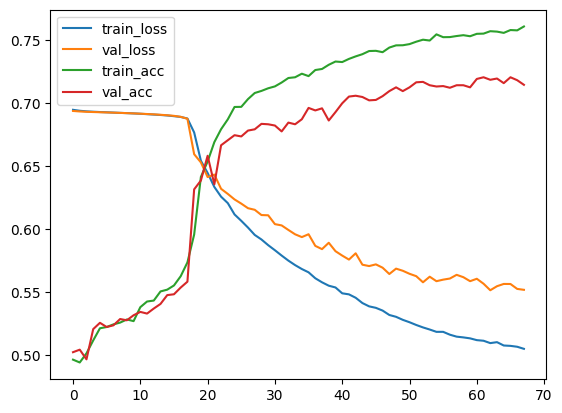

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'train_loss': train_losses,
    'val_loss': val_losses,
    'train_acc': train_accs,
    'val_acc': val_accs
})

df.plot() # DataFrame 컬럼들을 한번에 라인 플롯으로 시각화
plt.show()

### Embedding + LSTM

In [ ]:
# IMDB 감성분류 LSTM 모델 : 단어 ID 시퀀스를 Embedding 으로 변환한 뒤 LSTM을 거쳐 감성 점수 (logit)을 출력하는 모델
class SentimentEmbeddingNet(nn.Module):                 # PyTorch nn.Module을 상속받은 LSTM 모델 클래스 정의
    def __init__(self, input_dim,embedding_dim, hidden_dim, output_dim, num_layers=2):  # 입력·은닉·출력 차원을 받는 생성자
        super().__init__()                          # 부모 클래스(nn.Module) 초기화
        
        
        self.embedding = nn.Embedding(              # 단어 ID -> 임베딩 벡터로 변환
           num_embeddings=vocab_size,               # 단어 사전 크기
           embedding_dim=embedding_dim,             # 임베딩 차원 (각 차원을 embedding_dim 벡터로 표현)
           padding_idx=0                            # PAD(0) 토큰 임베딩은 업데이트 하지 않는다.
        )
                
        self.lstm = nn.LSTM(                        # LSTM 레이어 정의
            input_size=embedding_dim,               # 각 타임스텝 입력 벡터 차원
            hidden_size=hidden_dim,                 # 은닉 상태 차원
            batch_first=True,                       # 입력 형태를 (B, T, F)로 사용
            num_layers = num_layers
        )
        self.fc = nn.Linear(hidden_dim, output_dim) # 마지막 hidden을 출력 차원으로 변환하는 선형 레이어
    
    def forward(self, x):
        x = self.embedding(x)          # (B,T) -> (B,T,E)
        output, (hidden, cell) = self.lstm(x)
        output = self.fc(hidden[-1])
        return output
    
embedding_dim = 50                                  # 임베딩 벡터 차원
hidden_dim = 16                                     # LSTM 은닉 상태 차원
output_dim = 1                                      # 이진 분류를 출력(logit 1개)

model = SentimentEmbeddingNet(vocab_size, embedding_dim, hidden_dim, output_dim)  # 모델 생성
model                                             # 모델 구조 출력


SentimentEmbeddingNet(
  (embedding): Embedding(300, 50, padding_idx=0)
  (lstm): LSTM(50, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)

In [27]:
# LSTM 모델 파라미터(가중치/편향) 이름과 Shape확인
for name, param in model.named_parameters():
    print(name, param.shape)

embedding.weight torch.Size([300, 50])
lstm.weight_ih_l0 torch.Size([64, 50])
lstm.weight_hh_l0 torch.Size([64, 16])
lstm.bias_ih_l0 torch.Size([64])
lstm.bias_hh_l0 torch.Size([64])
lstm.weight_ih_l1 torch.Size([64, 16])
lstm.weight_hh_l1 torch.Size([64, 16])
lstm.bias_ih_l1 torch.Size([64])
lstm.bias_hh_l1 torch.Size([64])
fc.weight torch.Size([1, 16])
fc.bias torch.Size([1])


In [ ]:
# torchinfo로 모델 요약(summary) 확인
from torchinfo import summary

summary(model)  # 모델 레이어별 shape/파라미터 수 요약 출력

Layer (type:depth-idx)                   Param #
SentimentEmbeddingNet                    --
├─Embedding: 1-1                         15,000
├─LSTM: 1-2                              6,528
├─Linear: 1-3                            17
Total params: 21,545
Trainable params: 21,545
Non-trainable params: 0

파라미터 수에 따른 학습시간 계산에 사용한다. (x 데이터량)

### Emebedding + LSTM(bidirectional)

![](https://d.pr/i/0u69xz+)


**Bidirectional LSTM**은 LSTM의 변형 모델로, **양방향으로 데이터를 처리**할 수 있도록 설계된 구조이다. 일반 LSTM이 입력 데이터를 **순방향(forward)**으로만 처리하는 반면, Bidirectional LSTM은 **순방향**과 **역방향(backward)**으로 데이터를 동시에 처리하여 더 많은 정보를 학습한다.


1. **양방향 정보 학습**  
   - 순방향 LSTM은 이전 시점의 정보만을 사용하여 다음 시점의 출력을 계산한다.
   - Bidirectional LSTM은 데이터의 시간적 흐름을 순방향과 역방향으로 모두 고려하여 **이전**과 **이후**의 정보를 동시에 학습한다.

2. **문맥 정보 강화**  
   - 예를 들어, 텍스트 데이터를 처리할 때 문장의 맥락(Context)을 양방향으로 학습하여 더 정확한 결과를 얻을 수 있다.  
    - 예: "He went to the bank ..."에서 "bank"가 "은행"인지 "강둑"인지 구분하기 위해 이후 단어의 정보를 활용할 수 있다.
    - Forward LSTM:
    ```He → went → to → the → bank → to → withdraw → money```
    - Backward LSTM:
    ```money → withdraw → to → bank → the → to → went → He```

In [49]:
# LSTM
import torch                         # PyTorch(텐서 연산/딥러닝) 라이브러리 불러오기
import torch.nn as nn                # 신경망 레이어(nn) 모듈을 nn이라는 별칭으로 불러오기
import torch.optim as optim          # 최적화 알고리즘 (Adam 등)
batch_size = 2                       # B : 한 번에 처리할 샘플(문장) 개수 = 2
seq_len = 3                          # T : 시퀀스 길이(타임스텝 수) = 3
input_size = 4                       # F : 각 타임스텝의 입력 특징(feature) 차원 = 4
hidden_size = 5                      # H : LSTM의 hidden state(은닉 상태) 차원 = 5
num_layers = 2

x = torch.randn(batch_size, seq_len, input_size)  # (B, T, F) 모양의 랜덤 입력 텐서 생성
print(x.shape)                       # 입력 텐서의 shape 출력

# LSTM 생성 (B, T, F) 형태로 입력을 받도록 설정
lstm = nn.LSTM(
    input_size              # 입력 feature 차원 F : 각 시점에 들어오는 벡터 크기
    , hidden_size           # 은닉 상태 차원 H : LSTM
    , batch_first=True
    , num_layers=num_layers
    , bidirectional=True
)  # 양방향 LSTM
output, (hidden, cell) = lstm(x)              # 입력 x를 LSTM에 넣어 전체 출력(output)과 마지막 hidden(hidden) 얻기

print(output.shape)                  # output: 모든 타임스텝의 hidden state들 shape 출력 (B, T, H)
print(hidden.shape)                  # hidden: 마지막 타임스텝의 hidden state shape 출력 (num_layers*2, B, H)
print(cell.shape)                    # (Num_layers*2, B, H) : 마지막 시점 cell state


torch.Size([2, 3, 4])
torch.Size([2, 3, 10])
torch.Size([4, 2, 5])
torch.Size([4, 2, 5])


In [50]:
# IMDB 감성분류 LSTM 모델 (2-layer LSTM)
class SentimentNet(nn.Module):                 # PyTorch nn.Module을 상속받은 LSTM 모델 클래스 정의
    def __init__(self, vocab_size, embedding_dim,hidden_dim, output_dim,num_layers=2):  # 입력·은닉·출력 차원을 받는 생성자
        super().__init__()                          # 부모 클래스(nn.Module) 초기화
        self.embedding = nn.Embedding(
            num_embeddings=vocab_size,
            embedding_dim=embedding_dim,
            padding_idx=0

        )
        self.lstm = nn.LSTM(                          # LSTM 레이어 정의
            input_size=embedding_dim,                   # 각 타임스텝 입력 벡터 차원
            hidden_size=hidden_dim,                  # 은닉 상태 차원
            batch_first=True,                        # 입력 형태를 (B, T, F)로 사용
            bidirectional=True,
            num_layers=num_layers
        )
        self.fc = nn.Linear(hidden_dim * 2, output_dim) # 마지막 hidden을 출력 차원으로 변환하는 선형 레이어
    
    def forward(self, x):                           # 순전파 정의
        x=self.embedding(x)
        _, (hidden, _) = self.lstm(x)       # output : (B,T,H), hidden / cell : (1:layers_num, B, H)
        forward_pass = hidden[-2]
        backward_pass = hidden[-1]
        hidden = torch.cat((forward_pass,backward_pass),dim=1)
        output = self.fc(hidden)
        return output                               # 최종 예측 결과 반환 (B, output_dim) 반환
    
embedding_dim = 50                          # 단어 집합 크기(입력 차원)
hidden_dim = 16                                     # LSTM 은닉 상태 차원
output_dim = 1                                      # 이진 분류를 출력(logit 1개)

model = SentimentNet(vocab_size,embedding_dim, hidden_dim, output_dim, num_layers=2)  # 모델 생성
model                                             # 모델 구조 출력

SentimentNet(
  (embedding): Embedding(300, 50, padding_idx=0)
  (lstm): LSTM(50, 16, num_layers=2, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)

In [51]:
# LSTM 모델 파라미터(가중치/편향) 이름과 Shape확인
for name, param in model.named_parameters():
    print(name, param.shape)

embedding.weight torch.Size([300, 50])
lstm.weight_ih_l0 torch.Size([64, 50])
lstm.weight_hh_l0 torch.Size([64, 16])
lstm.bias_ih_l0 torch.Size([64])
lstm.bias_hh_l0 torch.Size([64])
lstm.weight_ih_l0_reverse torch.Size([64, 50])
lstm.weight_hh_l0_reverse torch.Size([64, 16])
lstm.bias_ih_l0_reverse torch.Size([64])
lstm.bias_hh_l0_reverse torch.Size([64])
lstm.weight_ih_l1 torch.Size([64, 32])
lstm.weight_hh_l1 torch.Size([64, 16])
lstm.bias_ih_l1 torch.Size([64])
lstm.bias_hh_l1 torch.Size([64])
lstm.weight_ih_l1_reverse torch.Size([64, 32])
lstm.weight_hh_l1_reverse torch.Size([64, 16])
lstm.bias_ih_l1_reverse torch.Size([64])
lstm.bias_hh_l1_reverse torch.Size([64])
fc.weight torch.Size([1, 32])
fc.bias torch.Size([1])


In [52]:
# torchinfo로 모델 요약(summary) 확인
from torchinfo import summary

summary(model)  # 모델 레이어별 shape/파라미터 수 요약 출력

Layer (type:depth-idx)                   Param #
SentimentNet                             --
├─Embedding: 1-1                         15,000
├─LSTM: 1-2                              15,104
├─Linear: 1-3                            33
Total params: 30,137
Trainable params: 30,137
Non-trainable params: 0

In [53]:
# 학습/검증 데이터 분리 및 DataLoader 구성
from torch.utils.data import random_split, DataLoader, TensorDataset  # 데이터셋 분리/로딩에 필요한 PyTorch 도구들

batch_size = 64                                  # 한 번에 모델에 넣을 데이터 개수(미니배치 크기)

train_size = int(len(X_train_padded) * 0.8)      # 전체 학습 데이터의 80%를 train으로 사용
val_size = len(X_train_padded) - train_size      # 나머지 20%를 validation 데이터로 사용

dataset = TensorDataset(X_train_padded, y_train) # (입력, 라벨) 쌍으로 이루어진 Dataset 생성

train_dataset, val_dataset = random_split(
    dataset,                                    # 분리할 전체 데이터셋
    [train_size, val_size]                     # 분리 비율 (train, validation)
)
test_dataset = TensorDataset(X_test_padded, y_test)

train_dataloader = DataLoader(
    train_dataset,                              # 학습용 데이터셋
    batch_size=batch_size,                      # 미니배치 크기
    shuffle=True                                # 매 epoch마다 데이터 순서를 섞음 (학습 성능 향상)
)

val_dataloader = DataLoader(
    val_dataset,                                # 검증용 데이터셋
    batch_size=batch_size,                      # 미니배치 크기
    shuffle=False                               # 검증 데이터는 순서 고정 (재현성)
)

test_dataloader = DataLoader(
    test_dataset,                                # 검증용 데이터셋
    batch_size=batch_size,                      # 미니배치 크기
    shuffle=False                               # 검증 데이터는 순서 고정 (재현성)
)

In [ ]:
from tqdm import tqdm

# GPU 활용 가능시 GPU 기반으로 LSTM 학습 루프 (BCEWithLogits + Adam + Early Stopping)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device', device)

# 매모리 캐시 정리
torch.cuda.empty_cache()

model = model.to(device)

criterion = nn.BCEWithLogitsLoss()          # 이진분류 손실 (시그모이드 포함 logit 입력용)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

epochs = 100

# 시각화를 위한 loss 기록
train_losses, val_losses, train_accs, val_accs = [], [] ,[], []

# 조기종료 관련
early_stopping_patience = 20
best_val_loss = float('inf')
early_stopping_counter = 0

for epoch in tqdm(range(epochs)):
    total_loss, correct, total = 0, 0, 0        # 누적 손실, 정답, 전체 샘플 수

    model.train()
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device).long()                 
        labels = labels.to(device).float().view(-1, 1)   

        optimizer.zero_grad()                   # 이전 배치 기울기 초기화
        
        output = model(inputs)                  # 순전파
        loss = criterion(output, labels)        # 손실계산
        loss.backward()                         # 역전파
        optimizer.step()                        # 파라미터 업데이트

        # 배치 로그
        total_loss += loss.item()               # 배치 손실을 스칼라로 누적
        p = torch.sigmoid(output)               # logit-> 0~1 확률로 변환
        pred = (p >= 0.5).float()   
        correct += (pred == labels).sum().item()        # 맞춘 개수
        total += labels.size(0)                 # 배치 샘플 수

    # 에폭 로그
    train_loss = total_loss / len(train_dataloader)     # 에폭별 평균 학습 손실
    train_losses.append(train_loss)     
    train_acc = correct / total
    train_accs.append(train_acc)

    # 검증
    model.eval()                                # 평가모드 (Dropout, BN 비활성화)
    val_loss, val_correct, val_total = 0, 0, 0  # 누적 손실, 정답, 전체 샘플 수
    with torch.no_grad():                       # 기울기 계산 비활성화
        for val_inputs, val_labels in val_dataloader:
            val_inputs = val_inputs.to(device).long()                 
            val_labels = val_labels.to(device).float().view(-1, 1)   
            output = model(val_inputs)
            loss = criterion(output, val_labels)

                    # 배치 로그
            val_loss += loss.item()
            p = torch.sigmoid(output)
            pred = (p >= 0.5).float()
            val_correct += (pred == val_labels).sum().item()
            val_total += val_labels.size(0)

        # 에폭 로그
        val_loss = val_loss / len(val_dataloader)
        val_losses.append(val_loss)
        val_acc = val_correct / val_total
        val_accs.append(val_acc)

        # 에폭 로그 출력
        print(f'Epoch {epoch+1} / {epochs} : Train Loss {train_loss:.4f} Train Acc {train_acc:.4f} val_loss {val_loss:.4f} val_acc {val_acc:.4f}')

        # 조기 종료
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stopping_counter = 0

        else:
            early_stopping_counter += 1
            if early_stopping_counter > early_stopping_patience:
                print(f'Early stopped at Epoch {epoch + 1}')
                break

device cpu


  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:03<05:21,  3.25s/it]

Epoch 1 / 100 : Train Lost 0.6924 Train Acc 0.5111 val_loss 0.6923 val_acc 0.5180


  2%|▏         | 2/100 [00:06<05:12,  3.19s/it]

Epoch 2 / 100 : Train Lost 0.6916 Train Acc 0.5299 val_loss 0.6917 val_acc 0.5120


  3%|▎         | 3/100 [00:09<05:08,  3.18s/it]

Epoch 3 / 100 : Train Lost 0.6901 Train Acc 0.5354 val_loss 0.6894 val_acc 0.5457


  4%|▍         | 4/100 [00:12<05:04,  3.17s/it]

Epoch 4 / 100 : Train Lost 0.6866 Train Acc 0.5632 val_loss 0.6847 val_acc 0.5637


  5%|▌         | 5/100 [00:16<05:09,  3.26s/it]

Epoch 5 / 100 : Train Lost 0.6786 Train Acc 0.5792 val_loss 0.6725 val_acc 0.5910


  6%|▌         | 6/100 [00:42<17:20, 11.07s/it]

Epoch 6 / 100 : Train Lost 0.6677 Train Acc 0.5978 val_loss 0.6628 val_acc 0.6050


  7%|▋         | 7/100 [01:16<28:54, 18.65s/it]

Epoch 7 / 100 : Train Lost 0.6585 Train Acc 0.6192 val_loss 0.6551 val_acc 0.6180


  8%|▊         | 8/100 [01:38<30:18, 19.77s/it]

Epoch 8 / 100 : Train Lost 0.6507 Train Acc 0.6285 val_loss 0.6515 val_acc 0.6177


  9%|▉         | 9/100 [01:41<22:05, 14.56s/it]

Epoch 9 / 100 : Train Lost 0.6432 Train Acc 0.6376 val_loss 0.6448 val_acc 0.6313


 10%|█         | 10/100 [01:45<16:36, 11.07s/it]

Epoch 10 / 100 : Train Lost 0.6389 Train Acc 0.6433 val_loss 0.6400 val_acc 0.6340


 11%|█         | 11/100 [01:48<12:53,  8.70s/it]

Epoch 11 / 100 : Train Lost 0.6281 Train Acc 0.6592 val_loss 0.6305 val_acc 0.6487


 12%|█▏        | 12/100 [01:51<10:25,  7.11s/it]

Epoch 12 / 100 : Train Lost 0.6206 Train Acc 0.6642 val_loss 0.6231 val_acc 0.6627


 13%|█▎        | 13/100 [01:56<09:03,  6.25s/it]

Epoch 13 / 100 : Train Lost 0.6110 Train Acc 0.6743 val_loss 0.6152 val_acc 0.6590


 14%|█▍        | 14/100 [02:00<08:04,  5.64s/it]

Epoch 14 / 100 : Train Lost 0.6030 Train Acc 0.6807 val_loss 0.6084 val_acc 0.6663


 15%|█▌        | 15/100 [02:04<07:18,  5.16s/it]

Epoch 15 / 100 : Train Lost 0.5943 Train Acc 0.6879 val_loss 0.6020 val_acc 0.6770


 16%|█▌        | 16/100 [02:08<06:50,  4.88s/it]

Epoch 16 / 100 : Train Lost 0.5912 Train Acc 0.6913 val_loss 0.5997 val_acc 0.6713


 17%|█▋        | 17/100 [02:13<06:50,  4.95s/it]

Epoch 17 / 100 : Train Lost 0.5855 Train Acc 0.6959 val_loss 0.5947 val_acc 0.6870


 18%|█▊        | 18/100 [02:18<06:34,  4.81s/it]

Epoch 18 / 100 : Train Lost 0.5792 Train Acc 0.7042 val_loss 0.5910 val_acc 0.6840


 19%|█▉        | 19/100 [02:25<07:24,  5.48s/it]

Epoch 19 / 100 : Train Lost 0.5742 Train Acc 0.7047 val_loss 0.5890 val_acc 0.6837


 20%|██        | 20/100 [02:30<06:59,  5.24s/it]

Epoch 20 / 100 : Train Lost 0.5682 Train Acc 0.7137 val_loss 0.5848 val_acc 0.6977


 21%|██        | 21/100 [02:34<06:40,  5.07s/it]

Epoch 21 / 100 : Train Lost 0.5664 Train Acc 0.7138 val_loss 0.5814 val_acc 0.6957


 22%|██▏       | 22/100 [02:39<06:27,  4.97s/it]

Epoch 22 / 100 : Train Lost 0.5604 Train Acc 0.7180 val_loss 0.5844 val_acc 0.6927


 23%|██▎       | 23/100 [02:44<06:16,  4.89s/it]

Epoch 23 / 100 : Train Lost 0.5561 Train Acc 0.7199 val_loss 0.5850 val_acc 0.6913


 24%|██▍       | 24/100 [02:48<06:06,  4.83s/it]

Epoch 24 / 100 : Train Lost 0.5526 Train Acc 0.7212 val_loss 0.5722 val_acc 0.7007


 25%|██▌       | 25/100 [02:53<05:56,  4.75s/it]

Epoch 25 / 100 : Train Lost 0.5476 Train Acc 0.7267 val_loss 0.5698 val_acc 0.7047


 26%|██▌       | 26/100 [02:58<05:51,  4.75s/it]

Epoch 26 / 100 : Train Lost 0.5441 Train Acc 0.7276 val_loss 0.5722 val_acc 0.7077


 27%|██▋       | 27/100 [03:02<05:43,  4.71s/it]

Epoch 27 / 100 : Train Lost 0.5412 Train Acc 0.7279 val_loss 0.5674 val_acc 0.7027


 28%|██▊       | 28/100 [03:22<11:00,  9.18s/it]

Epoch 28 / 100 : Train Lost 0.5369 Train Acc 0.7320 val_loss 0.5707 val_acc 0.7053


 29%|██▉       | 29/100 [03:57<19:59, 16.90s/it]

Epoch 29 / 100 : Train Lost 0.5358 Train Acc 0.7322 val_loss 0.5640 val_acc 0.7097


 30%|███       | 30/100 [04:24<23:25, 20.08s/it]

Epoch 30 / 100 : Train Lost 0.5300 Train Acc 0.7367 val_loss 0.5623 val_acc 0.7103


 31%|███       | 31/100 [04:28<17:18, 15.05s/it]

Epoch 31 / 100 : Train Lost 0.5288 Train Acc 0.7366 val_loss 0.5643 val_acc 0.7073


 32%|███▏      | 32/100 [05:01<23:11, 20.46s/it]

Epoch 32 / 100 : Train Lost 0.5253 Train Acc 0.7421 val_loss 0.5655 val_acc 0.7107


 33%|███▎      | 33/100 [05:36<27:43, 24.82s/it]

Epoch 33 / 100 : Train Lost 0.5241 Train Acc 0.7424 val_loss 0.5594 val_acc 0.7107


 34%|███▍      | 34/100 [06:11<30:47, 27.99s/it]

Epoch 34 / 100 : Train Lost 0.5206 Train Acc 0.7410 val_loss 0.5623 val_acc 0.7133


 35%|███▌      | 35/100 [06:46<32:34, 30.07s/it]

Epoch 35 / 100 : Train Lost 0.5197 Train Acc 0.7438 val_loss 0.5598 val_acc 0.7113


 36%|███▌      | 36/100 [06:58<26:10, 24.54s/it]

Epoch 36 / 100 : Train Lost 0.5166 Train Acc 0.7464 val_loss 0.5566 val_acc 0.7130


 37%|███▋      | 37/100 [07:01<19:12, 18.29s/it]

Epoch 37 / 100 : Train Lost 0.5141 Train Acc 0.7467 val_loss 0.5593 val_acc 0.7220


 38%|███▊      | 38/100 [07:05<14:28, 14.00s/it]

Epoch 38 / 100 : Train Lost 0.5117 Train Acc 0.7497 val_loss 0.5588 val_acc 0.7123


 39%|███▉      | 39/100 [07:10<11:30, 11.31s/it]

Epoch 39 / 100 : Train Lost 0.5098 Train Acc 0.7505 val_loss 0.5570 val_acc 0.7177


 40%|████      | 40/100 [07:36<15:43, 15.72s/it]

Epoch 40 / 100 : Train Lost 0.5091 Train Acc 0.7501 val_loss 0.5607 val_acc 0.7100


 41%|████      | 41/100 [07:40<11:59, 12.19s/it]

Epoch 41 / 100 : Train Lost 0.5065 Train Acc 0.7497 val_loss 0.5556 val_acc 0.7167


 42%|████▏     | 42/100 [07:46<09:57, 10.31s/it]

Epoch 42 / 100 : Train Lost 0.5044 Train Acc 0.7536 val_loss 0.5545 val_acc 0.7173


 43%|████▎     | 43/100 [07:52<08:27,  8.91s/it]

Epoch 43 / 100 : Train Lost 0.5015 Train Acc 0.7557 val_loss 0.5542 val_acc 0.7233


 44%|████▍     | 44/100 [07:57<07:12,  7.72s/it]

Epoch 44 / 100 : Train Lost 0.5007 Train Acc 0.7578 val_loss 0.5549 val_acc 0.7220


 45%|████▌     | 45/100 [08:01<06:11,  6.76s/it]

Epoch 45 / 100 : Train Lost 0.4997 Train Acc 0.7533 val_loss 0.5597 val_acc 0.7240


 46%|████▌     | 46/100 [08:34<13:10, 14.63s/it]

Epoch 46 / 100 : Train Lost 0.4989 Train Acc 0.7592 val_loss 0.5514 val_acc 0.7190


 47%|████▋     | 47/100 [09:12<19:05, 21.62s/it]

Epoch 47 / 100 : Train Lost 0.4961 Train Acc 0.7583 val_loss 0.5549 val_acc 0.7207


 48%|████▊     | 48/100 [09:50<22:59, 26.53s/it]

Epoch 48 / 100 : Train Lost 0.4961 Train Acc 0.7579 val_loss 0.5564 val_acc 0.7137


 49%|████▉     | 49/100 [10:14<21:53, 25.76s/it]

Epoch 49 / 100 : Train Lost 0.4940 Train Acc 0.7612 val_loss 0.5580 val_acc 0.7250


 50%|█████     | 50/100 [10:18<15:53, 19.08s/it]

Epoch 50 / 100 : Train Lost 0.4918 Train Acc 0.7624 val_loss 0.5590 val_acc 0.7163


 51%|█████     | 51/100 [10:21<11:43, 14.35s/it]

Epoch 51 / 100 : Train Lost 0.4947 Train Acc 0.7602 val_loss 0.5534 val_acc 0.7187


 52%|█████▏    | 52/100 [10:25<08:52, 11.09s/it]

Epoch 52 / 100 : Train Lost 0.4893 Train Acc 0.7625 val_loss 0.5594 val_acc 0.7273


 53%|█████▎    | 53/100 [10:28<06:56,  8.87s/it]

Epoch 53 / 100 : Train Lost 0.4873 Train Acc 0.7636 val_loss 0.5573 val_acc 0.7160


 54%|█████▍    | 54/100 [10:32<05:33,  7.25s/it]

Epoch 54 / 100 : Train Lost 0.4855 Train Acc 0.7650 val_loss 0.5540 val_acc 0.7187


 55%|█████▌    | 55/100 [10:36<04:47,  6.39s/it]

Epoch 55 / 100 : Train Lost 0.4842 Train Acc 0.7662 val_loss 0.5547 val_acc 0.7183


 56%|█████▌    | 56/100 [10:41<04:18,  5.87s/it]

Epoch 56 / 100 : Train Lost 0.4840 Train Acc 0.7686 val_loss 0.5542 val_acc 0.7163


 57%|█████▋    | 57/100 [10:45<03:55,  5.49s/it]

Epoch 57 / 100 : Train Lost 0.4850 Train Acc 0.7675 val_loss 0.5538 val_acc 0.7280


 58%|█████▊    | 58/100 [10:50<03:41,  5.28s/it]

Epoch 58 / 100 : Train Lost 0.4804 Train Acc 0.7698 val_loss 0.5543 val_acc 0.7230


 59%|█████▉    | 59/100 [10:55<03:30,  5.15s/it]

Epoch 59 / 100 : Train Lost 0.4794 Train Acc 0.7709 val_loss 0.5596 val_acc 0.7127


 60%|██████    | 60/100 [11:00<03:21,  5.03s/it]

Epoch 60 / 100 : Train Lost 0.4780 Train Acc 0.7692 val_loss 0.5514 val_acc 0.7270


 61%|██████    | 61/100 [11:04<03:12,  4.93s/it]

Epoch 61 / 100 : Train Lost 0.4797 Train Acc 0.7694 val_loss 0.5532 val_acc 0.7250


 62%|██████▏   | 62/100 [11:21<05:15,  8.32s/it]

Epoch 62 / 100 : Train Lost 0.4764 Train Acc 0.7746 val_loss 0.5564 val_acc 0.7227


 63%|██████▎   | 63/100 [11:56<10:03, 16.31s/it]

Epoch 63 / 100 : Train Lost 0.4764 Train Acc 0.7736 val_loss 0.5536 val_acc 0.7193


 64%|██████▍   | 64/100 [12:02<07:56, 13.24s/it]

Epoch 64 / 100 : Train Lost 0.4742 Train Acc 0.7759 val_loss 0.5562 val_acc 0.7210


 65%|██████▌   | 65/100 [12:27<09:49, 16.85s/it]

Epoch 65 / 100 : Train Lost 0.4726 Train Acc 0.7745 val_loss 0.5610 val_acc 0.7230


 66%|██████▌   | 66/100 [13:00<12:20, 21.79s/it]

Epoch 66 / 100 : Train Lost 0.4715 Train Acc 0.7772 val_loss 0.5557 val_acc 0.7193


 67%|██████▋   | 67/100 [13:36<14:17, 25.99s/it]

Epoch 67 / 100 : Train Lost 0.4728 Train Acc 0.7729 val_loss 0.5569 val_acc 0.7237


 68%|██████▊   | 68/100 [14:10<15:10, 28.44s/it]

Epoch 68 / 100 : Train Lost 0.4728 Train Acc 0.7743 val_loss 0.5555 val_acc 0.7190


 69%|██████▉   | 69/100 [14:46<15:45, 30.51s/it]

Epoch 69 / 100 : Train Lost 0.4694 Train Acc 0.7760 val_loss 0.5558 val_acc 0.7183


 70%|███████   | 70/100 [15:18<15:36, 31.22s/it]

Epoch 70 / 100 : Train Lost 0.4662 Train Acc 0.7805 val_loss 0.5569 val_acc 0.7207


 71%|███████   | 71/100 [15:52<15:22, 31.81s/it]

Epoch 71 / 100 : Train Lost 0.4655 Train Acc 0.7794 val_loss 0.5580 val_acc 0.7217


 72%|███████▏  | 72/100 [16:24<14:54, 31.95s/it]

Epoch 72 / 100 : Train Lost 0.4655 Train Acc 0.7784 val_loss 0.5571 val_acc 0.7217


 73%|███████▎  | 73/100 [16:59<14:49, 32.94s/it]

Epoch 73 / 100 : Train Lost 0.4625 Train Acc 0.7819 val_loss 0.5606 val_acc 0.7227


 74%|███████▍  | 74/100 [17:31<14:11, 32.74s/it]

Epoch 74 / 100 : Train Lost 0.4632 Train Acc 0.7806 val_loss 0.5542 val_acc 0.7263


 75%|███████▌  | 75/100 [17:37<10:12, 24.51s/it]

Epoch 75 / 100 : Train Lost 0.4656 Train Acc 0.7808 val_loss 0.5546 val_acc 0.7247


 76%|███████▌  | 76/100 [17:41<07:22, 18.45s/it]

Epoch 76 / 100 : Train Lost 0.4624 Train Acc 0.7816 val_loss 0.5581 val_acc 0.7247


 77%|███████▋  | 77/100 [17:45<05:22, 14.04s/it]

Epoch 77 / 100 : Train Lost 0.4589 Train Acc 0.7867 val_loss 0.5622 val_acc 0.7257


 78%|███████▊  | 78/100 [17:50<04:10, 11.40s/it]

Epoch 78 / 100 : Train Lost 0.4590 Train Acc 0.7863 val_loss 0.5613 val_acc 0.7230


 79%|███████▉  | 79/100 [17:55<03:18,  9.47s/it]

Epoch 79 / 100 : Train Lost 0.4592 Train Acc 0.7853 val_loss 0.5622 val_acc 0.7237


 80%|████████  | 80/100 [18:00<02:43,  8.18s/it]

Epoch 80 / 100 : Train Lost 0.4557 Train Acc 0.7835 val_loss 0.5593 val_acc 0.7253


 80%|████████  | 80/100 [18:05<04:31, 13.57s/it]

Epoch 81 / 100 : Train Lost 0.4577 Train Acc 0.7847 val_loss 0.5637 val_acc 0.7267
Early stopped at Epoch 81
